# Project: Investigate a Dataset
## Titanic Data

### Introduction 
This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website (https://www.kaggle.com/c/titanic), where the data was obtained.


### Questions
In this analysis, I would like to explore the following questions.

1. Was age a factor in determining the chances of survival?

2. Did women had a better survival rate than men?

3. How was children's survival rate as compared to men or women?

4. Was Socio-economic status or paasenger class a factor in determining the survival rate?

### Data Dictionary

 - survival: Survival (0 = No, 1 = Yes)
 - pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
 - sex: Sex
 - Age: Age in years
 - sibsp: Number of siblings / spouses aboard the Titanic
 - parch: Number of parents / children aboard the Titanic
 - ticket: Ticket number
 - fare:Passenger fare
 - cabin:Cabin number
 - embarked:Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

**pclass**: A proxy for socio-economic status (SES)
 -1st = Upper
 -2nd = Middle
 -3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
 - Sibling = brother, sister, stepbrother, stepsister
 - Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
-  Parent = mother, father
-  Child = daughter, son, stepdaughter, stepson
-  Some children travelled only with a nanny, therefore parch=0 for them

In [1]:
# importing  required libraries

# Render plots inline
%matplotlib inline

import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
#import ipy_table as tbl


# import data from csv file
titanic_df = pd.read_csv('titanic_data.csv')
# Checking the number of rows(observations) and colmumns(variables)
titanic_df.shape


(891, 12)

In [2]:
titanic_df.head(n=10) # Looking at first few rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Looking at the the datatypes
titanic_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Looking at the variables and the posed questions, we do not need the following variables:
- PassengerId      
- Name            
- Ticket          
- Fare           
- Cabin           
- Embarked 
- SibSp
- Parch

So, we would remove the unwanted variables to save the processing time. 


In [4]:
#Drop unwanted variables
#titanic_new = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin','Embarked', 'SibSp', 'Parch'], axis = 1) 
titanic_new = titanic_df.loc[:, ['Survived', 'Pclass', 'Sex', 'Age']]


In [5]:
#know your data - viewing first few records of the dataset   
titanic_new.head(n=10) 


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN
6,0,1,male,54.0
7,0,3,male,2.0
8,1,3,female,27.0
9,1,2,female,14.0


In [6]:
titanic_new.tail(n=10) #know your data - viewing last few records of the dataset


,Survived,Pclass,Sex,Age
881,0,3,male,33.0
882,0,3,female,22.0
883,0,2,male,28.0
884,0,3,male,25.0
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0
890,0,3,male,32.0


We can see that there are some Nan values for the variable Age. Lets find out Nan values (if any) for each of our variables.


In [7]:
# Finding number of missing values for each variable
titanic_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
dtype: int64

In [8]:
titanic_Nan = titanic_new[titanic_new.isnull().any(axis = 1)] # subsetting the data containing only Nan values for Age

titanic_Nan.groupby('Sex').size() # Looking at missing values for males and females seperately 



Sex
female     53
male      124
dtype: int64

This shows age is missing for 53 females and 124 males in our dataset. We can keep a note of this for futher analysis based upon sex and age.


** Question 1: Was age a factor in determining the chances of survival? **


In [9]:
titanic_new.describe() #looking at some basic statistics of for all numeric variables in our dataset

,Survived,Pclass,Age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


A few things that we note here from above statistics are as follows:
- Our count for Age shows that we have Age for 714 passangers out of 891 (same as we saw earlier)
- Mean age is 29.7 and 75% of pasengers are below the age of 38.
- Minimum age is 0.42 and maximum age is 80.

Now lets look at the statistics for Age for survivors and non-survivors seperately. However, we would need to impute the missing values first. Keeping in mind that missing values will largely affect the means and count if we replace them with mean/median, so we would rather drop them and then compare the survivor and non-survivor group seperately.   


In [10]:
titanic_with_NAN = titanic_new.copy()
titanic_new = titanic_new.dropna() # Drop all rows with missing values for age.

group_by_survival_age = titanic_new.groupby(['Survived'])['Age'].describe() # Statistics for survivors and non-sorvivors 
group_by_survival_age



Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

The mean age for suvivors and non-survivors is very close. With the standard deviation also very close(14.17 and 14.95), it implies that the mean for one group is well within one standard deviation from the other. So the difference in mean ages is not statistically significant.  

Let's plot histograms for each group and analyse the distribution. 

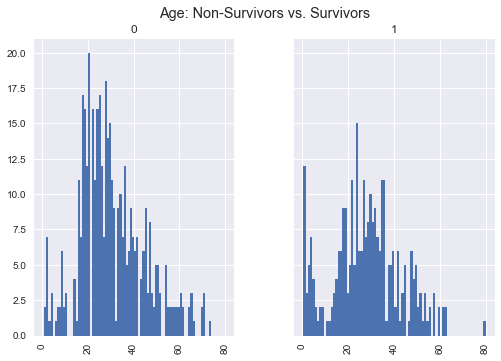

In [11]:
import pylab as pl

titanic_new['Age'].hist(by = titanic_new['Survived'], bins = 80, sharey= True, sharex = True)
pl.suptitle('Age: Non-Survivors vs. Survivors')



Analyzing the the histograms of survivors and non-survivors: 
- There are more number of survivals in the age group 1-10 as compared to other ages. But a similar pattern can be seen for non-survivals ages 1-10 as well. So the survival rate for children doesn't seem to be significantly different from other ages. 
- There's a significant peak in the first bin for Survivors. It seems that there are a lot of infants amongst the survivors. 
- No other significant patterns for the rest of the ages can be observed. 
So, Lets explore the infant survival rate further.

In [12]:
# Lets explore the infant survival rates.

survived_below_1 = titanic_new[(titanic_new['Age'] <1)]
survived_below_1


,Survived,Pclass,Sex,Age
78,1,2,male,0.83
305,1,1,male,0.92
469,1,3,female,0.75
644,1,3,female,0.75
755,1,2,male,0.67
803,1,3,male,0.42
831,1,2,male,0.83


We can see a very interesting point here:
**All the children below the age of 1 SURVIVED!**

Hence, from our descriptive statistics and the histograms above, we can infer that 
1. Age was not a factor in determining the chances of survival.
2. All the infants below the age of 1 survived. This leads us to think that maybe infants or children were given preference while boarding the lifeboats.  


**Question 2: Did women had a better survival rate than men?**


In [13]:

survival_sex = pd.crosstab(titanic_new["Survived"], 
                           titanic_new["Sex"])

survival_sex.columns = ["Female", "Male"]

survival_sex.index = ["Died", "Survived"]
survival_sex


,Female,Male
Died,64,360
Survived,197,93


From this table, percentage of women who survived is 75% and percentage of men survived is 21%.
We can clearly see that females survival rate was very high than the males. 
Lets validate it further statistically and test if survival rate was dependent upon gender or not.  
Our dependent variable is 'Survived' and the independent variable is 'Sex'. Since both are categorical, we would use chi-square test to test the relationship between both the variables. 

-  Null Hypotheiss( $H_0$) : Sex and Survived are independent.
-  Alternate Hypothesis( $H_A$): $H_0$ is false.

We will use $\alpha$ = 0.05, to test the significance. 



In [14]:



chi2, p, dof, expected = stats.chi2_contingency(survival_sex.values)

results = [
    ['Chi-Square Test Statistic',chi2],
    ['P-Value', p],
    ['Degrees of Freedom', dof],
    ['Expected Values', expected]
]
print results
if p < 0.05:
    print "P-Value is than 0.05. So, we Reject the Null Hypothesis"
else:
    print "Fail to reject Null Hypothesis"


[['Chi-Square Test Statistic', 205.02582752855909], ['P-Value', 1.6716678441395054e-46], ['Degrees of Freedom', 1L], ['Expected Values', array([[ 154.99159664,  269.00840336],
       [ 106.00840336,  183.99159664]])]]
P-Value is than 0.05. So, we Reject the Null Hypothesis


P-value for the chi-square test is less than 0.05, hence we can reject the null hypothesis that sex and survival rate are independent of each other. 

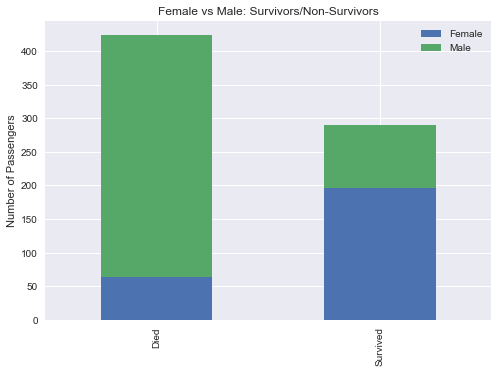

In [15]:
bar_survival_sex = survival_sex.plot(kind='bar', stacked = True, title = "Female vs Male: Survivors/Non-Survivors")
bar_survival_sex.set_ylabel("Number of Passengers")

From our findings in Question 1, we found out that all infants below the age of 1 years survived. And in question 2, we found that females survival rate is way higher than that of males. 
So it makes us think that females and children were given preference to board the life boats. Lets explore this further.

**Question 3: How was children's survival rate as compared to men or women?**


In [27]:

# Lets split the variable 'Sex' into three categories Male, Female and Child. 

def findStatus(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex


titanic_new['Status'] = titanic_new[['Age', 'Sex']].apply(findStatus, axis=1)

titanic_new.head(n= 10)

,Survived,Pclass,Sex,Age,Status
0,0,3,male,22.0,male
1,1,1,female,38.0,female
2,1,3,female,26.0,female
3,1,1,female,35.0,female
4,0,3,male,35.0,male
6,0,1,male,54.0,male
7,0,3,male,2.0,child
8,1,3,female,27.0,female
9,1,2,female,14.0,child
10,1,3,female,4.0,child


In [17]:
# Lets look at survival probability for males, females and children 

survived_status = pd.crosstab(titanic_new["Status"], titanic_new["Survived"]).apply(lambda r: ((r/r.sum())).round(2), axis=1)

survived_status.index = ["Children", "Female", "Male"]

survived_status.columns = ["Died", "Survived"]

survived_status




,Died,Survived
Children,0.41,0.59
Female,0.22,0.78
Male,0.83,0.17


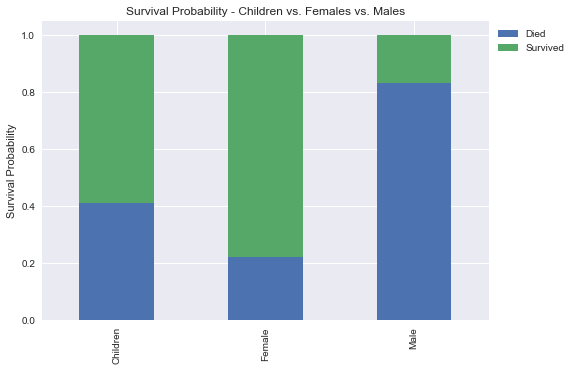

In [18]:
# Plotting bar charts for Survival status grouped by Status
import matplotlib.pyplot as plt

fig = plt.figure()
g = survived_status.plot(kind='bar', stacked = True, title = "Survival Probability - Children vs. Females vs. Males")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.ylabel('Survival Probability')


The above statistics, survival probabilities and barplots show that survival rate for women and children are more than that for men. 
This leads us to ponder that preference was given to women and children while boarding the lifeboats. However, if that was true, more children should have been saved. Currently, from our analysis, the percentage survival for children stands at 59% as compared to women's which is 78%. Hence, we cannot say for sure, if children and women were given preference to lifeboats. But, chidren and women did fairly well as compared to men in terms of survival rate.

**Question 4: Was Socio-economic status or passenger class a factor in determining the survival rate?**

Since we are not looking at the variable age anymore. We will use the complete dataset(titanic_with_NAN) including the rows that had missing values for age. 

In [19]:
#Looking at numbers for males and females seperately for each class 
group_class_sex = titanic_with_NAN.groupby(['Pclass', 'Sex']).size()
group_class_sex

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [20]:
# Looking at percentages
group_class_sex.groupby(level=0).apply(lambda x:
                                       (100 * x / float(x.sum())).round(2))

Pclass  Sex   
1       female    43.52
        male      56.48
2       female    41.30
        male      58.70
3       female    29.33
        male      70.67
dtype: float64

We can note a couple of important points in this data which might be useful in later analysis
- First, maximum number of passengers travelled in Pclass 3
- Second, male to female ratio in Pclass 3 is notably high. 71% of the passengers in Pclass 3 are males. 

In [21]:
# Lets look at the numbers for Survived and non-suvived for each of the three classes. 
group_by_survival_Pclass = titanic_with_NAN.groupby(['Pclass', 'Survived']).size()
print group_by_survival_Pclass


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64


In [22]:
# By percentages
group_by_survival_Pclass.groupby(level=0).apply(lambda x:
                                       (100 * x / float(x.sum())).round(2))

Pclass  Survived
1       0           37.04
        1           62.96
2       0           52.72
        1           47.28
3       0           75.76
        1           24.24
dtype: float64

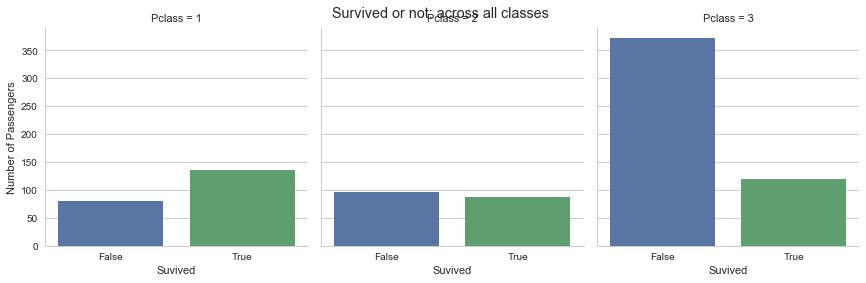

In [23]:
# Looking at the factorplot for the above numbers
sns.set_style("whitegrid")
s = sns.factorplot(x='Survived', col = 'Pclass', data = titanic_with_NAN, kind = 'count')

s.set_axis_labels('Suvived', 'Number of Passengers').set_xticklabels(['False', 'True'])
pl.suptitle('Survived or not: across all classes')


There are maximum number of deaths in the passeneger class 3. This can be attributed partly to the above noted point that maximum number of passengers were travelling in Pclass 3. So the maximum number of lives lost were also in Pclass 3. 
However, looking at the percentages, Pclass still had the worst scenario. 75% passengers died in Pclass 3 as compared to 37% and 52% in Pclass 1 and Pclass 3 respectively. Survival rate was best in Pclass-1 62.96%. 

Now lets explore the Pclass further combining it with the gender class. 


In [24]:
#Grouping by Pclass and Sex
group_survived_class_sex = titanic_with_NAN.groupby(['Pclass','Survived','Sex']).size()
group_survived_class_sex 



Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

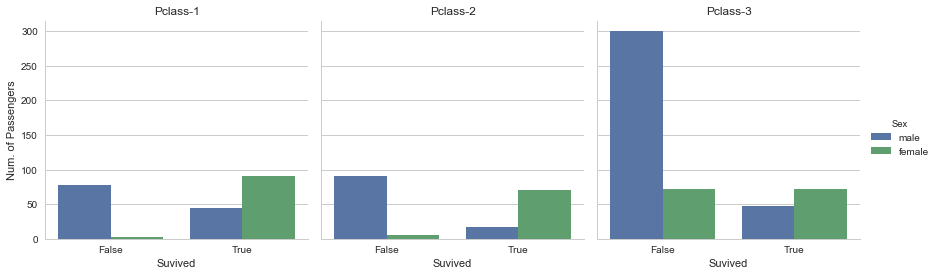

In [25]:
# Visualizing the data for males and females survived or not across all classes
sns.set_style("whitegrid")
plot_class = sns.factorplot('Survived', col='Pclass', hue='Sex', kind='count', data = titanic_with_NAN)

# Fixing the labels
(plot_class.set_axis_labels('Suvived', 'Num. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Pclass-1', 'Pclass-2', 'Pclass-3']
for ax, title in zip(plot_class.axes.flat, titles):
    ax.set_title(title)
    


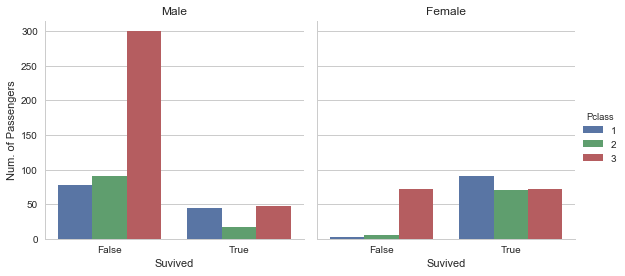

In [26]:
# Visualizing the data for males and females survived or not across all classes

sns.set_style("whitegrid")
plot_class = sns.factorplot('Survived', col='Sex', hue='Pclass', kind='count', data = titanic_with_NAN)

# Fixing the labels
(plot_class.set_axis_labels('Suvived', 'Num. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Male', 'Female']
for ax, title in zip(plot_class.axes.flat, titles):
    ax.set_title(title)
    


As seen above, male lives lost in the passenger class 3 is substantially higher than in any other classes. P-class 1 had the best rate for women survival. 

### Conclsion:
Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass). 
> - Age: Doesn't play much role in determining the survival chances, except for ages below 1 years. 
- Sex: Women had better chances of survival than men. 
- In general, Women & children across all classes had higer survival rates than men.
- Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate. 

So we can say, that being a women in Pclass-1 seems to have the best chances of survival. However being a child or woman could not be considered as 100% survival chance.

**Limitations**

- The Age data was incomplete. Almost 20% of the age values were missing. We chose to remove the rows with missng values instead of imputing it with mean/median which would otherwise impact any descriptive statistics. So, we had even smaller sample size, which is less representative of the whole population that boarded Titanic. 
- Since we didnot have a clear age demarcation for children vs adults, we assumed the cutt off value for age of chidren as 16 years. This might have have skewed some of the numbers. 

